# Data Preprocessing

>## 1. import packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

>## 2. load dataset

In [2]:
df = pd.read_csv('movie.csv')

>## 3. look at data

In [3]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


>## 4. Handle missing values

In [4]:
for col in df.columns:
    number_null = df.loc[: , col].isnull().sum()
    perc_null = (number_null / df.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

name - 0 - %0.0
rating - 77 - %1.004
genre - 0 - %0.0
year - 0 - %0.0
released - 2 - %0.026
score - 3 - %0.039
votes - 3 - %0.039
director - 0 - %0.0
writer - 3 - %0.039
star - 1 - %0.013
country - 3 - %0.039
budget - 2171 - %28.312
gross - 189 - %2.465
company - 17 - %0.222
runtime - 4 - %0.052


In [5]:
#drop the null values
print("Dimension before: " , df.shape)
df = df.dropna(subset = ['rating','released','score','votes','writer','star','country','gross','company','runtime'])
print("Dimension after: " , df.shape)

Dimension before:  (7668, 15)
Dimension after:  (7412, 15)


In [6]:
#find distribution shape
print('Skewness :' , round(df['budget'].skew() ,3))

mean_budget = df['budget'].mean()
median_budget = df['budget'].median()

if mean_budget > median_budget:
    print('Mean is bigger than Median. Left Skewed. Median for imputing')
else:
    print('Mean is smaller than Median. Right Skewed. Mean for imputing')

Skewness : 2.443
Mean is bigger than Median. Left Skewed. Median for imputing


In [7]:
#impute with median
df['budget'] = df['budget'].fillna(median_budget).round(0)

In [8]:
#check null again
for col in df.columns:
    number_null = df.loc[: , col].isnull().sum()
    perc_null = (number_null / df.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

name - 0 - %0.0
rating - 0 - %0.0
genre - 0 - %0.0
year - 0 - %0.0
released - 0 - %0.0
score - 0 - %0.0
votes - 0 - %0.0
director - 0 - %0.0
writer - 0 - %0.0
star - 0 - %0.0
country - 0 - %0.0
budget - 0 - %0.0
gross - 0 - %0.0
company - 0 - %0.0
runtime - 0 - %0.0


>## 5. Sanity checks on “Year”

In [9]:
import re

# Create a new column 'year' in the DataFrame
df['Years'] = ''
df = df.reset_index(drop=True)

# Define a regular expression pattern to match the year
pattern = r"\b\d{4}\b"

# Iterate over the rows in the DataFrame
for i in range(df.shape[0]):
    date_string = df.iloc[i, 4]  # Assuming the date is in the 5th column (index 4)
    # Search for the year using the regular expression pattern
    match = re.search(pattern, date_string)
    if match:
        year = match.group(0)
        df.at[i, 'Years'] = year  # Assign the extracted year to the 'year' column
    else:
        df.at[i, 'Years'] = 'Year not found'  # Assign a default value when year is not found

In [10]:
df = df.drop('year',axis=1)

>## 6. Handle duplicate rows

In [11]:
def has_duplicate_rows(data):
    df = pd.DataFrame(data)
    duplicate_rows = df.duplicated()
    return any(duplicate_rows)

has_duplicate_rows(df)

False

<hr>

# Exploratory Data Analysis

In [69]:
! pip install sweetviz

     --------------------------------------- 15.1/15.1 MB 29.7 MB/s eta 0:00:00


In [73]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('Statistical_Analysis.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report Statistical_Analysis.html was generated.


>## 1. Qualitative Variables

Please read the report file.

>## 2. Quantitative Variables

In [118]:
def kde_plot(x):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize = (8,3))
    sns.distplot(df[x], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})
    sns.despine(left = True)
    
    mean_age = df[x].mean()
    median_age = df[x].median()
    
    plt.axvline(mean_age, color ='black', linestyle ='dashed')
    plt.axvline(median_age, color ='green', linestyle ='solid')
    plt.xlabel('')
    plt.ylabel('')
    
    return plt.show()

C:\Users\Mehrdad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


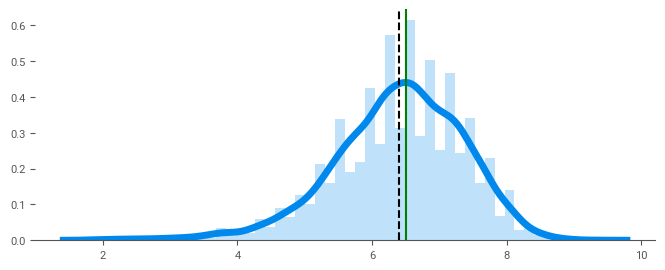

In [121]:
kde_plot('score')

C:\Users\Mehrdad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


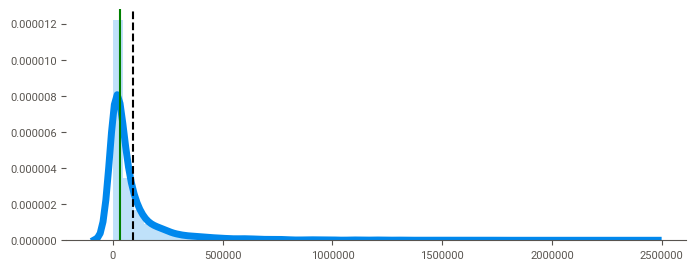

In [122]:
kde_plot('votes')

C:\Users\Mehrdad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


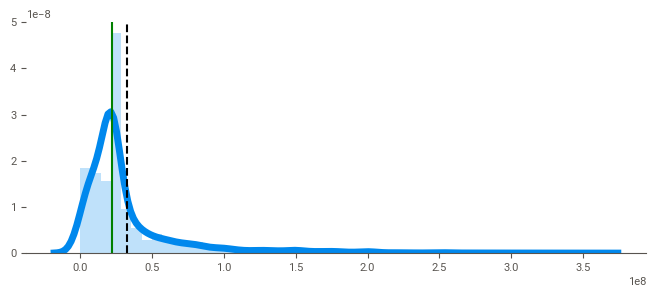

In [123]:
kde_plot('budget')

C:\Users\Mehrdad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


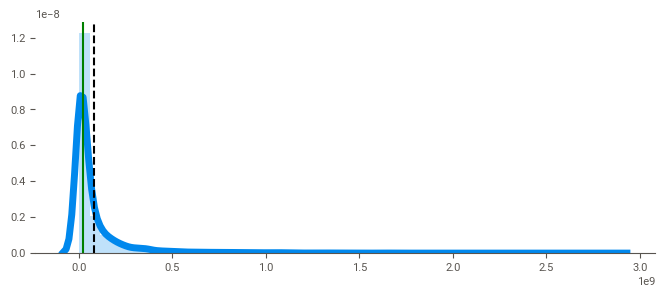

In [124]:
kde_plot('gross')

C:\Users\Mehrdad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


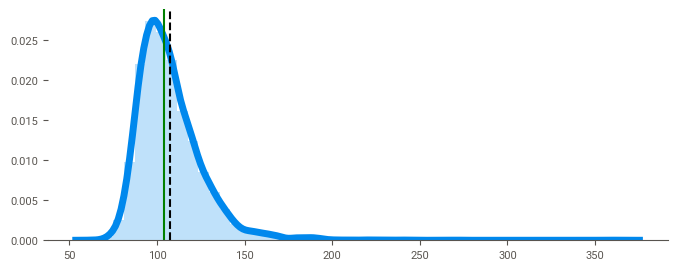

In [125]:
kde_plot('runtime')

<hr>

In [149]:
#minimum score
df[df['score'] == df['score'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
4386,Superbabies: Baby Geniuses 2,PG,Comedy,"August 27, 2004 (United States)",1.9,30000.0,Bob Clark,Robert Grasmere,Jon Voight,Germany,20000000.0,9448644.0,ApolloMedia Distribution,88.0,2004
5094,Disaster Movie,PG-13,Comedy,"August 29, 2008 (United States)",1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000.0,34816824.0,Lionsgate,87.0,2008
5142,The Hottie & the Nottie,PG-13,Comedy,"February 21, 2008 (Russia)",1.9,36000.0,Tom Putnam,Heidi Ferrer,Paris Hilton,United States,21800000.0,1596232.0,Purple Pictures,91.0,2008


In [150]:
#maximum score
df[df['score'] == df['score'].max()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
2273,The Shawshank Redemption,R,Drama,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291.0,Castle Rock Entertainment,142.0,1994


<hr>

In [151]:
#minimum votes
df[df['votes'] == df['votes'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
582,Petit Con,R,Comedy,"April 19, 1985 (United States)",6.2,105.0,Gérard Lauzier,Gérard Lauzier,Guy Marchand,France,21800000.0,127426.0,Gaumont International,90.0,1985


In [152]:
#maximum votes
df[df['votes'] == df['votes'].max()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
2273,The Shawshank Redemption,R,Drama,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0,1994
5032,The Dark Knight,PG-13,Action,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0,2008


<hr>

In [153]:
#minimum budget
df[df['budget'] == df['budget'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
3136,Following,R,Crime,"November 5, 1999 (United Kingdom)",7.5,89000.0,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000.0,48482.0,Next Wave Films,69.0,1999


In [154]:
#maximum budget
df[df['budget'] == df['budget'].max()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
7221,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019


<hr>

In [155]:
#minimum gross
df[df['gross'] == df['gross'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
3021,Trojan War,PG-13,Comedy,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000.0,309.0,Daybreak,85.0,1997


In [156]:
#maximum gross
df[df['gross'] == df['gross'].max()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
5233,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009


<hr>

# Correlation Analysis

>## 1. Pearson Correlation

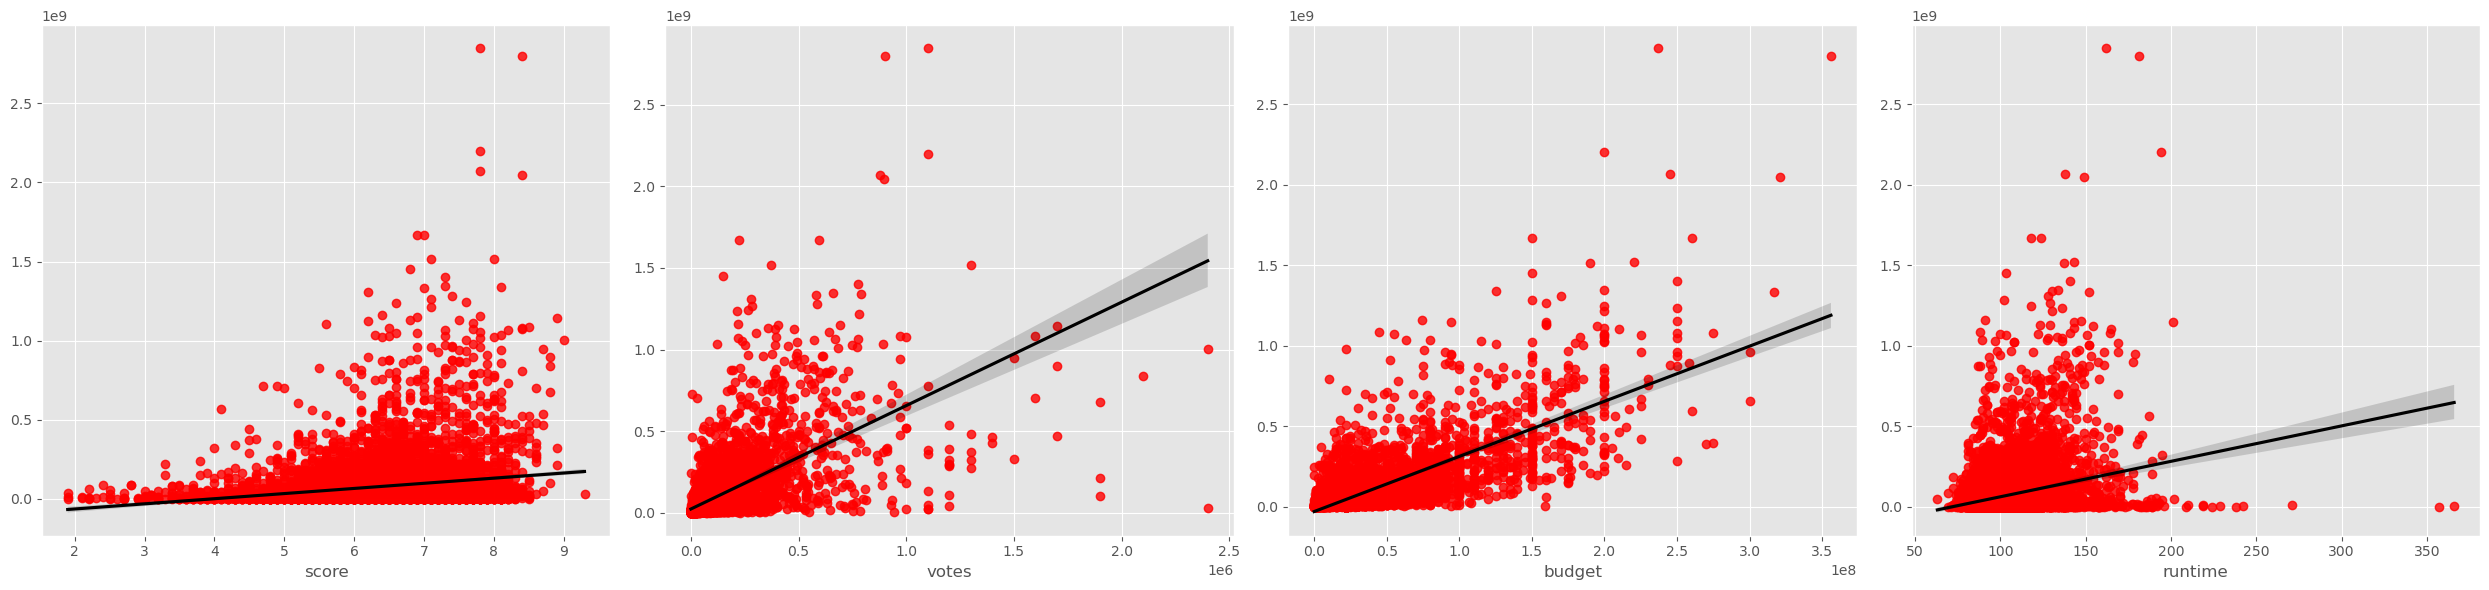

In [12]:
#declare numeric variable
numeric = ['score','votes','budget','runtime']

# Create a grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(25, 6))

# Flatten the axes array to make it 1D
axes = axes.ravel()

# Loop through each subplot and plot sns.regplot
for i, col in enumerate(numeric):
    sns.regplot(x=col, y='gross', data=df, ax=axes[i], scatter_kws={"color": "red"}, line_kws={"color":"black"})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

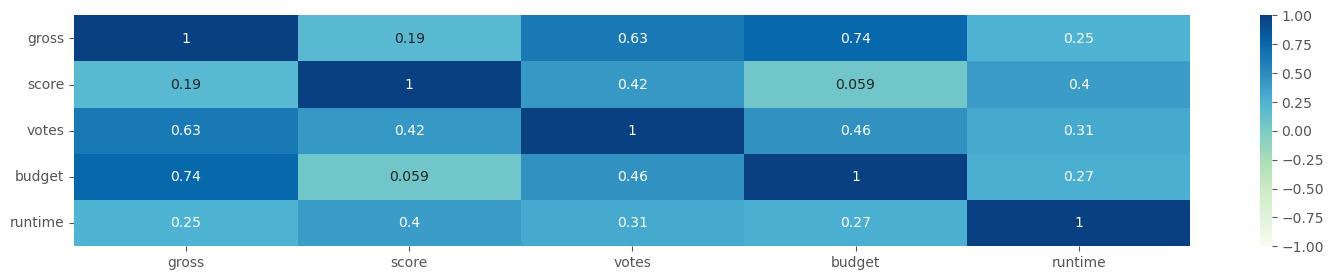

In [13]:
pearson_cor = df[['gross','score','votes','budget','runtime']].corr(method = 'pearson')

plt.figure(figsize = (18,3))

sns.heatmap(pearson_cor,
            vmin = -1,
            vmax = 1,
            cmap = "GnBu",
            annot = True)
plt.show()

>## 2. ANOVA Correlation

In [ ]:
cat_list = ['name', 'rating', 'genre','director', 'writer', 'star', 'country', 'company', 'Years']

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_list:
    formula = 'gross ~ {}'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_value = anova.iloc[0,3]

    print('P-value for gross ~ {}: {}'.format(i , p_value))

In [36]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['gross'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['gross'], inplace=False, ascending=False)
    
    return mean_by.head(5)

In [37]:
mean_pairwise('rating')

,gross
rating,
G,1.420433e+08
PG-13,1.309839e+08
TV-PG,1.202498e+08
PG,1.066129e+08
TV-MA,7.917078e+07


In [38]:
mean_pairwise('genre')

,gross
genre,
Animation,2.413567e+08
Family,2.157876e+08
Action,1.458350e+08
Adventure,1.095587e+08
Mystery,1.011835e+08


In [39]:
mean_pairwise('director')

,gross
director,
Anthony Russo,1.368850e+09
Kyle Balda,1.097122e+09
Josh Cooley,1.073395e+09
Chris Buck,1.059909e+09
Lee Unkrich,9.373943e+08


In [40]:
mean_pairwise('writer')

,gross
writer,
Christopher Markus,1.083883e+09
Irene Mecchi,1.083721e+09
Rick Jaffa,1.076159e+09
Byron Howard,1.024121e+09
J.R.R. Tolkien,9.970720e+08


In [41]:
mean_pairwise('star')

,gross
star,
Donald Glover,1.670728e+09
Daisy Ridley,1.120174e+09
Neel Sethi,9.665549e+08
Craig T. Nelson,9.381233e+08
Chris Pratt,8.797427e+08


In [42]:
mean_pairwise('country')

,gross
country,
Malta,3.527941e+08
New Zealand,2.647805e+08
China,2.177334e+08
Finland,1.691938e+08
United States,9.020570e+07


In [52]:
mean_pairwise('company')

,gross
company,
Marvel Studios,1.255466e+09
Illumination Entertainment,1.097122e+09
Fairview Entertainment,9.665549e+08
B24,8.806815e+08
Avi Arad Productions,8.560852e+08


In [53]:
mean_pairwise('Years')

,gross
Years,
2020,1.668662e+08
2017,1.475836e+08
2016,1.410022e+08
2018,1.407065e+08
2019,1.402180e+08
